In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
x = df.drop('species', axis = 1)
y = df['species']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 101)

In [7]:
model = DecisionTreeClassifier(random_state = 101)

In [8]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [9]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


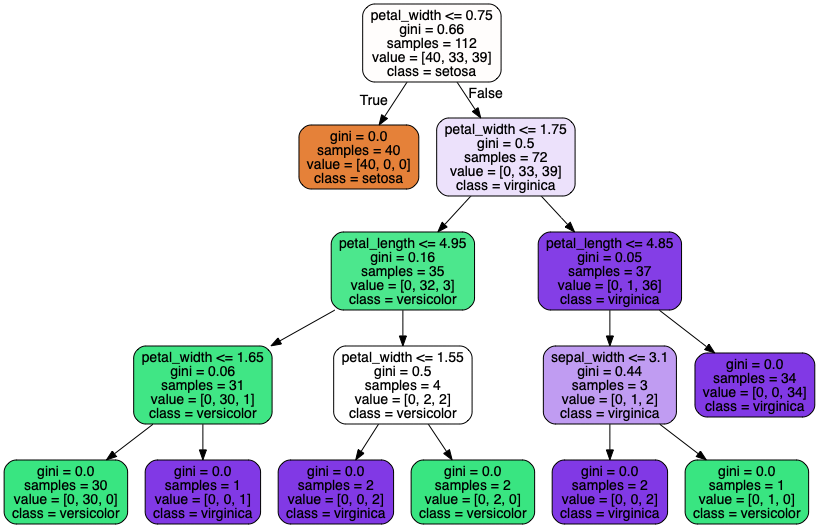

In [10]:
iris = StringIO()  
export_graphviz(model, out_file=iris,feature_names=X_train.columns,filled=True,rounded=True, 
                class_names = df['species'].unique(), precision = 2, proportion = False)

graph = pydot.graph_from_dot_data(iris.getvalue())  
Image(graph[0].create_png()) 

In [11]:
df[df.petal_width > 0.75]['species'].value_counts()

virginica     50
versicolor    50
Name: species, dtype: int64

In [12]:
prediction = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

# Minimum Sample Leaf

In [14]:
model2 = DecisionTreeClassifier(random_state = 101, min_samples_leaf = 30 )

In [15]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

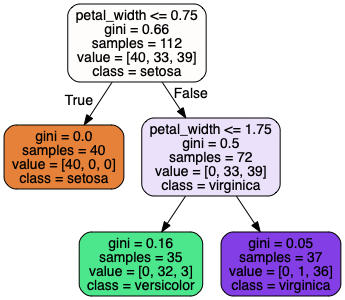

In [16]:
iris2 = StringIO()  
export_graphviz(model2, out_file=iris2,feature_names=X_train.columns,filled=True,rounded=True, 
                class_names = df['species'].unique(), precision = 2, proportion = False)

graph = pydot.graph_from_dot_data(iris2.getvalue())  
Image(graph[0].create_png()) 